# Entorno de trabajo

Puesta en marcha de Python, OpenCV y jupyter notebooks.

## Instalación

Clonamos el repositorio con el material de la asignatura:

    git clone https://github.com/albertoruiz/umucv.git
    
En días sucesivos lo iremos actualizando con

    git pull
    
Otra posibilidad es descargar solo la versión más reciente:

    wget https://github.com/albertoruiz/umucv/archive/master.zip
    unzip master.zip

### LINUX

Descargamos [miniconda](https://conda.io/miniconda.html) para nuestro sistema con python 3 y lo instalamos.

    bash Miniconda3-latest-Linux-x86_64.sh
        

Creamos un [entorno de conda](https://conda.io/projects/conda/en/latest/user-guide/tasks/manage-environments.html) con todo lo necesario:

    wget https://robot.inf.um.es/material/va/okvisionreq.txt
    
    wget https://robot.inf.um.es/material/va/install-pip.sh
    
    conda create --name via --file okvisionreq.txt
    
    conda activate via
    
    bash install-pip.sh

Podemos añadir al final de nuestro `.bashrc` una orden `conda activate via` para que automáticamente los terminales que abramos estén en el entorno deseado.

### Versión anterior, obsoleta

Nos movemos a la carpeta raíz del respositorio umucv, donde está el archivo `visionreq.txt`, e instalamos un nuevo 
[entorno de conda](https://conda.io/projects/conda/en/latest/user-guide/tasks/manage-environments.html) con casi todos los paquetes necesarios:

    conda create --name vision -c menpo -c conda-forge --file visionreq.txt
    
En un nuevo terminal activamos el entorno e instalamos el resto de paquetes. El primero es una colección de funciones útiles para la asignatura, [spyder](https://www.spyder-ide.org/) es un entorno de desarrollo, y [dlib](http://dlib.net/) es una excelente biblioteca de funciones de visión artificial que incluye el detector de *landmarks* faciales.

    conda activate vision
    
    pip install --upgrade https://robot.inf.um.es/material/umucv.tar.gz
    
    conda install spyder
    
    pip install dlib
    
(Este último tarda unos minutos debido a que se compila una biblioteca grande en C++. Si da algún problema puede ser necesario `sudo apt-get install build-essential cmake`)

Para no tener que activar cada vez el entorno se puede añadir el path directamente en `.bashrc`

Si las ventanas de OpenCV fallan, puede ser necesario `sudo apt-get install libgtk2.0-0`

### WINDOWS y MAC

Estamos pendientes de encontrar la combinación de versiones de python y opencv adecuada. Mientras tanto se recomienda utilizar una máquina virtual con ubuntu.

## Prueba rápida

En primer lugar importamos las bibliotecas necesarias.

In [1]:
%matplotlib inline

import numpy             as np
import cv2               as cv
import matplotlib.pyplot as plt

from skimage import io

Para importar una imagen podríamos usar `imread` de opencv. El problema es que intercambia los canales R y B:

In [2]:
img = cv.imread('../images/coins.png')
print(type(img))
print(img.shape)
#print(img)

<class 'numpy.ndarray'>
(600, 800, 3)


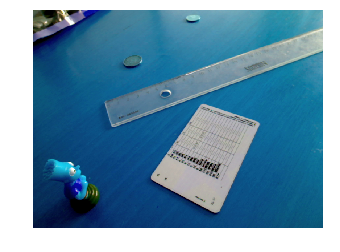

In [3]:
plt.imshow(img)
plt.axis('off');

Para arreglarlo usamos la función que convierte espacios de color.

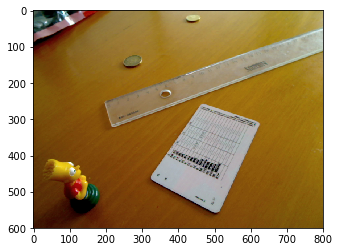

In [4]:
plt.imshow(cv.cvtColor(img,cv.COLOR_BGR2RGB));

Podemos intercambiar los canales aprovechando las posibilidades de indexado de arrays de numpy:

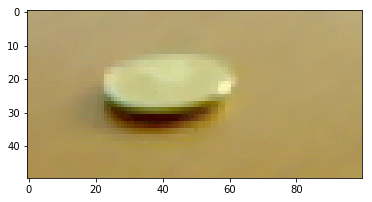

In [5]:
plt.imshow(img[:50,400:500,[2,1,0]]);

Pero es más sencillo usar `imread` de skimage, que además puede leer de url remotas.

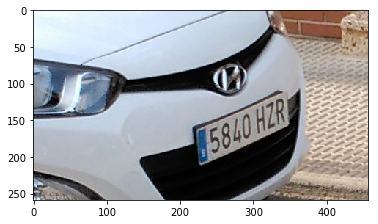

In [6]:
path = "http://robot.inf.um.es/material/va/images/"

view = io.imread(path+"plate.jpg")
plt.imshow(view);

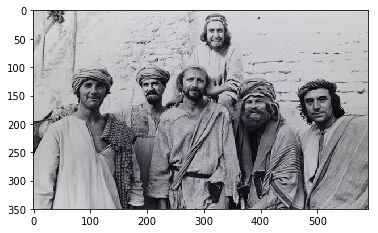

In [7]:
plt.imshow(io.imread("../images/monty-python1.jpg"));